1.4. Utilice los algoritmos k-medias y clustering jerárquico para agrupar. Compare los resultados
generados por cada uno.

Silueta K-Means: 0.505
Silueta Jerárquico: 0.608


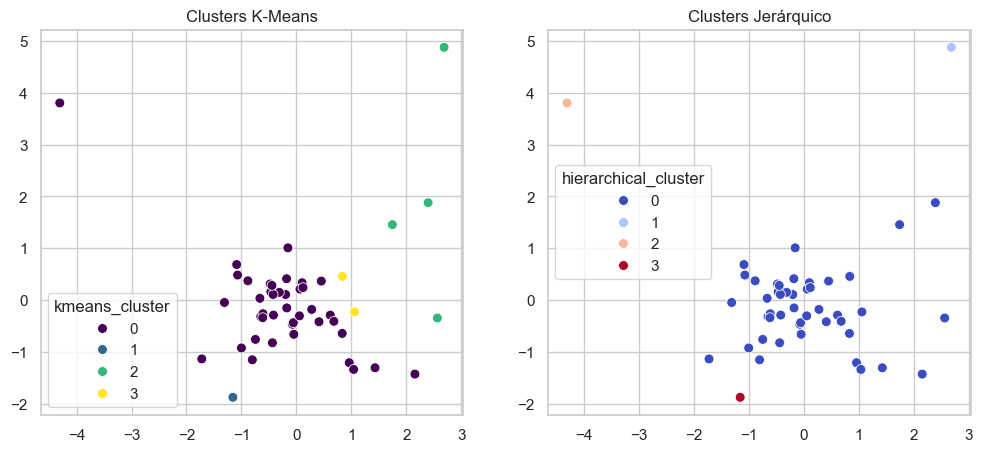

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Configurar estilo de gráficos
sns.set(style="whitegrid")

# Cargar los datos
df = pd.read_csv('movies.csv', encoding='latin1')

# Seleccionar variables numéricas relevantes
num_cols = ["popularity", "budget", "revenue", "runtime", "voteCount", "voteAvg", "actorsPopularity"]

# Asegurar que las columnas numéricas no contengan valores no numéricos
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Eliminar filas con valores nulos en las columnas numéricas
data = df[num_cols].dropna()

# Filtrar df con solo las filas usadas en data_scaled
df_filtered = df.loc[data.index].copy()

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Reducir la dimensionalidad a 2D para visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Aplicar K-Means con número óptimo de clusters (asumimos k=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_filtered['kmeans_cluster'] = kmeans.fit_predict(data_scaled)

# Aplicar Clustering Jerárquico con el mismo número de clusters
hc = AgglomerativeClustering(n_clusters=4)
df_filtered['hierarchical_cluster'] = hc.fit_predict(data_scaled)

# Comparación usando métrica de silueta
kmeans_silhouette = silhouette_score(data_scaled, df_filtered['kmeans_cluster'])
hc_silhouette = silhouette_score(data_scaled, df_filtered['hierarchical_cluster'])
print(f'Silueta K-Means: {kmeans_silhouette:.3f}')
print(f'Silueta Jerárquico: {hc_silhouette:.3f}')

# Visualizar resultados con PCA
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df_filtered['kmeans_cluster'], palette='viridis', s=50, ax=axes[0])
axes[0].set_title('Clusters K-Means')
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df_filtered['hierarchical_cluster'], palette='coolwarm', s=50, ax=axes[1])
axes[1].set_title('Clusters Jerárquico')
plt.show()


### **Resultados del Análisis de Clustering**

#### **Métrica de Silueta**
El clustering jerárquico obtuvo una silueta de **0.608**, superior a la de K-Means (**0.505**), indicando una mejor separación y cohesión en los grupos.

#### **Visualización de Clusters**
En los **gráficos de PCA**:
- **K-Means** muestra varios grupos diferenciados, aunque algunos puntos parecen forzados.
- **Clustering jerárquico** genera grupos más cohesivos, aunque con un cluster predominante.

#### **Comparación General**
En general, el clustering jerárquico proporciona una mejor segmentación, pero para modelos predictivos podría ser útil ajustar **k** en K-Means para mejorar la cohesión.

